In [1]:
from collections import Counter
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
%time data = pd.read_csv('Data_for_UCI_named.csv')

Wall time: 234 ms


In [3]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
data.index = np.arange(1, len(data)+1)

In [6]:
print(f'The numbers of column is the dataset is: {len(data.columns)}')
print(f'The numbers of rows in the dataset is: {data.shape[0]}')

The numbers of column is the dataset is: 14
The numbers of rows in the dataset is: 10000


In [7]:
data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [8]:
percent_missing = data.isnull().sum()/data.shape[0]

In [9]:
percent_missing

tau1     0.0
tau2     0.0
tau3     0.0
tau4     0.0
p1       0.0
p2       0.0
p3       0.0
p4       0.0
g1       0.0
g2       0.0
g3       0.0
g4       0.0
stab     0.0
stabf    0.0
dtype: float64

In [10]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [11]:
numerics = ['float64']

print("Number of numberic attributes : " + str(len(data.select_dtypes(include=numerics).columns)))
print("Number of categorical attributes : " + str(len(data.select_dtypes(include=['object']).columns)))

Number of numberic attributes : 13
Number of categorical attributes : 1


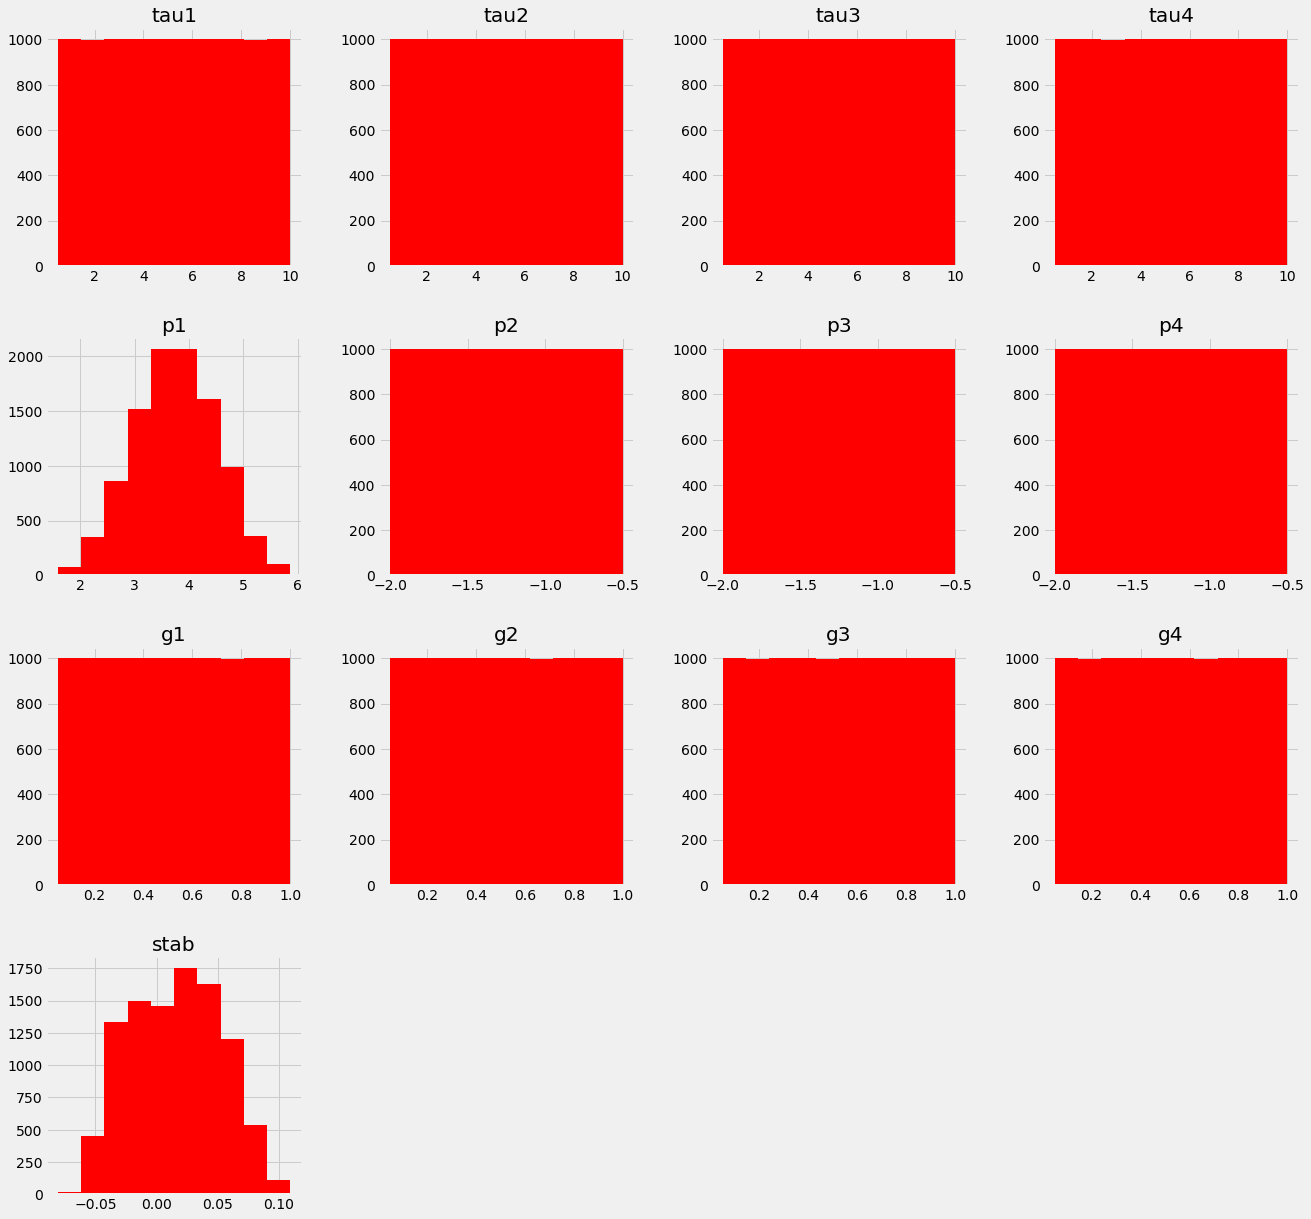

In [12]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca();
data.hist(ax = ax,color='r');

In [13]:
data['stabf'].value_counts(normalize=True)

unstable    0.638
stable      0.362
Name: stabf, dtype: float64

Text(0.5, 1.0, 'Percentage distribution of instances in the target column')

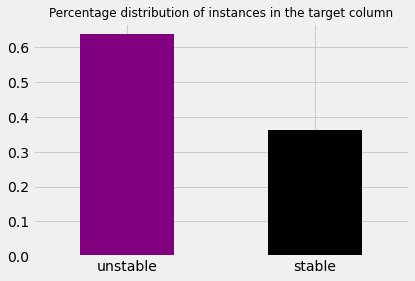

In [14]:
# Show the numbers of observations in the target column.

data['stabf'].value_counts(normalize=True).plot.bar(color = ['purple','black'],rot=0)
plt.title('Percentage distribution of instances in the target column',fontsize=12)

-` There are more unstable instances than stable instance and as such the dataset is imbalance

In [15]:
cov = data.corr()
cov

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601


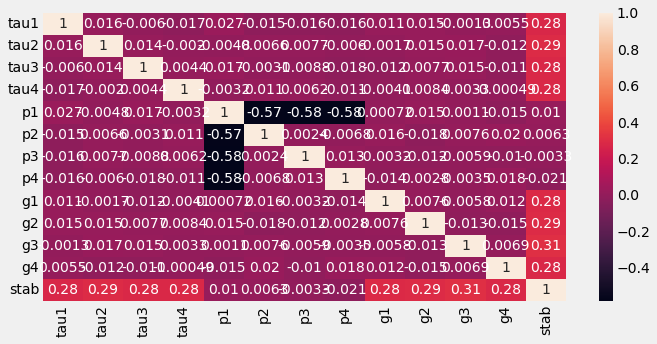

In [16]:
plot = sns.heatmap(data.corr(), annot=True)
fig = plot.figure
fig.set_size_inches(10, 5)
fig.set_tight_layout(True)

In [17]:
cov['stab'].sort_values(ascending=False)

stab    1.000000
g3      0.308235
g2      0.293601
tau2    0.290975
g1      0.282774
tau3    0.280700
g4      0.279214
tau4    0.278576
tau1    0.275761
p1      0.010278
p2      0.006255
p3     -0.003321
p4     -0.020786
Name: stab, dtype: float64

In [18]:
data['stabf'] = np.where(data['stabf']=='unstable',0,1)

In [19]:

data['stabf'].value_counts(normalize=True)

0    0.638
1    0.362
Name: stabf, dtype: float64

**The target column is imblance having more instances of unstable(0) than stable (1)**

In [20]:
X = data.drop(['stab','stabf'],axis=1)
y = data['stabf']

In [21]:
print('X shape', X.shape)
print('y shape', y.shape)

X shape (10000, 12)
y shape (10000,)


## Building ML MODELS

In [22]:
%%time

from sklearn.model_selection import train_test_split, cross_val_score,KFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier 
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier 
from sklearn.preprocessing import StandardScaler

Wall time: 3.47 s


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [24]:
print(f'The shape of the X_train is {X_train.shape} \nThe shape of the X_test is {X_test.shape}')
print(f'The shape of the y_train is {y_train.shape} \nThe shape of the y_test is {y_test.shape}')
print('\n')
print(f'distribution of instances in the ytrain {Counter(y_train)}')
print(f'distribution of instances in the ytest {Counter(y_test)}')

The shape of the X_train is (8000, 12) 
The shape of the X_test is (2000, 12)
The shape of the y_train is (8000,) 
The shape of the y_test is (2000,)


distribution of instances in the ytrain Counter({0: 5092, 1: 2908})
distribution of instances in the ytest Counter({0: 1288, 1: 712})


In [25]:
#Scaling the input data

Scaler = StandardScaler()
scaled_Xtrain = Scaler.fit(X_train)
scaled_Xtrain = Scaler.transform(X_train)
scaled_xtest = Scaler.transform(X_test)

In [26]:
#function the train and test the model on the dataset
def train_model(model,xdata,ydata,xtestdata,ytestdata):
    """
    The function trains and test input model on input dataset
    input: The function takes 5 positional argument which are
            the model and the training and testing dataset
    
    return: it returns a float data types as the accuracy score 
            of the model
    """
    model.fit(xdata,ydata)
    prediction = model.predict(xtestdata)
    accuracy = accuracy_score(prediction,ytestdata)
    print(f'The accuracy score of the {model} model is:')
    return accuracy
    

In [27]:
def eval_metric(ypred, ytest):
    from sklearn.metrics import classification_report, confusion_matrix

    """
    This function shows both the classification report
    and confusion matrix.
    """
    
    confuse = confusion_matrix(ypred,ytest)
    classification = classification_report(ypred,ytest)
    print(f'The classification report is shown below \n{classification}')
    print("\n")
    
    sns.heatmap(confuse,annot=True)
    plt.xlabel('Actual value')
    plt.ylabel('Predicted value')
    plt.title('Confusion matrix of the electric stability dataset')
    plt.show()

### **Training 3 different models on both the scaled and unscaled dataset**

# 

## **Random Forest Classifier**

In [28]:
#unscaled dataset

train_model(RandomForestClassifier(random_state=1),X_train,y_train,X_test,y_test)

The accuracy score of the RandomForestClassifier(random_state=1) model is:


0.9295

In [29]:
#scaled dataset

train_model(RandomForestClassifier(random_state=1),scaled_Xtrain,y_train,scaled_xtest,y_test)

The accuracy score of the RandomForestClassifier(random_state=1) model is:


0.9295

**Random Forest Classifier Evaluation metrics**

In [30]:
random = RandomForestClassifier(random_state=1)
random.fit(X_train,y_train)
prediction = random.predict(X_test)

The classification report is shown below 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1329
           1       0.87      0.93      0.90       671

    accuracy                           0.93      2000
   macro avg       0.92      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000





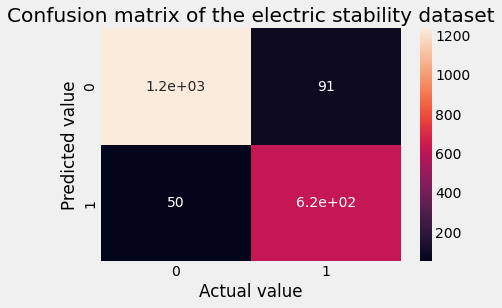

In [31]:
eval_metric(prediction,y_test)

## **XGBoost Classifier**

In [32]:
#unscaled dataset

train_model(XGBClassifier(random_state=1),X_train,y_train,X_test,y_test)

[09:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy score of the XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) model is:


0.9455

In [33]:
#scaled dataset

train_model(XGBClassifier(random_state=1),scaled_Xtrain,y_train,scaled_xtest,y_test)

[09:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy score of the XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) model is:


0.9455

**XGBoost Evaluation metrics**

[09:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The classification report is shown below 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1307
           1       0.91      0.94      0.92       693

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000





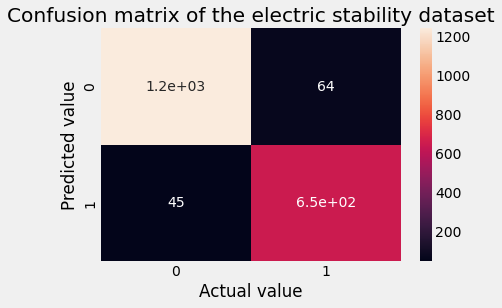

In [34]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)
prediction = xgb.predict(X_test)
eval_metric(prediction,y_test)

## **Lightgbm Classifier**

In [35]:
#unscaled dataset

train_model(LGBMClassifier(random_state=1),X_train,y_train,X_test,y_test)

The accuracy score of the LGBMClassifier(random_state=1) model is:


0.939

In [36]:
#scaled dataset

train_model(LGBMClassifier(random_state=1),scaled_Xtrain,y_train,scaled_xtest,y_test)

The accuracy score of the LGBMClassifier(random_state=1) model is:


0.9395

**Lightgbm Evaluation metrics**

The classification report is shown below 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1322
           1       0.89      0.94      0.91       678

    accuracy                           0.94      2000
   macro avg       0.93      0.94      0.93      2000
weighted avg       0.94      0.94      0.94      2000





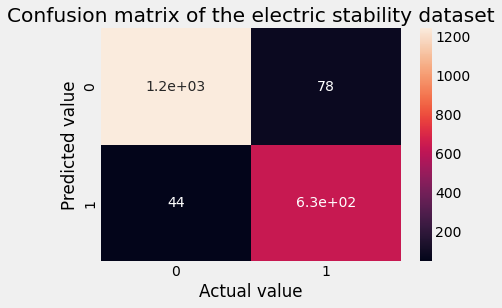

In [37]:
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(X_train,y_train)
prediction = lgbm.predict(X_test)
eval_metric(prediction,y_test)

# **SMOTING THE DATASET**

In [38]:
sm = SMOTE(random_state=1)
X_sm,y_sm = sm.fit_resample(X,y)

In [39]:
print(f'distribution of instances in the resample target variable {Counter(y_sm)}')

distribution of instances in the resample target variable Counter({0: 6380, 1: 6380})


In [40]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm,test_size=0.2, random_state=1)

In [41]:
print(f'distribution of instances in the resample ytrain {Counter(y_train_sm)}')
print(f'distribution of instances in the resample ytest {Counter(y_test_sm)}')

distribution of instances in the resample ytrain Counter({1: 5122, 0: 5086})
distribution of instances in the resample ytest Counter({0: 1294, 1: 1258})


In [42]:
Scaler = StandardScaler()
scaled_Xtrain_sm = Scaler.fit(X_train_sm)
scaled_Xtrain_sm = Scaler.transform(X_train_sm)
scaled_xtest_sm = Scaler.transform(X_test_sm)

## **Smote Random Forest Classifier**

In [43]:
#unscaled dataset

train_model(RandomForestClassifier(random_state=1),X_train_sm, y_train_sm, X_test_sm, y_test_sm)

The accuracy score of the RandomForestClassifier(random_state=1) model is:


0.9420062695924765

In [44]:
#scaled dataset

train_model(RandomForestClassifier(random_state=1),scaled_Xtrain_sm, y_train_sm, scaled_xtest_sm, y_test_sm)

The accuracy score of the RandomForestClassifier(random_state=1) model is:


0.9420062695924765

### **Smote Random forest evaluation metric**

The classification report is shown below 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1256
           1       0.96      0.93      0.94      1296

    accuracy                           0.94      2552
   macro avg       0.94      0.94      0.94      2552
weighted avg       0.94      0.94      0.94      2552





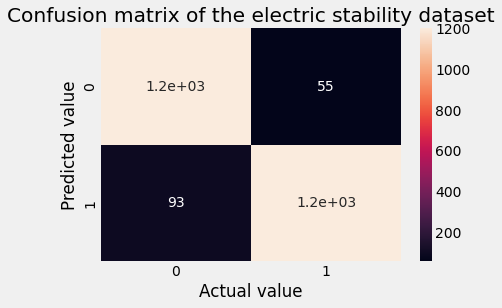

In [45]:
random = RandomForestClassifier(random_state=1)
random.fit(X_train_sm,y_train_sm)
prediction = random.predict(X_test_sm)
eval_metric(prediction,y_test_sm)

## **Smote XGBoost Classifier**

In [46]:
#unscaled dataset

train_model(XGBClassifier(random_state=1), X_train_sm, y_train_sm, X_test_sm, y_test_sm)

[09:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy score of the XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) model is:


0.9561128526645768

In [47]:
#scaled dataset

train_model(XGBClassifier(random_state=1),scaled_Xtrain_sm, y_train_sm, scaled_xtest_sm, y_test_sm)

[09:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy score of the XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) model is:


0.9561128526645768

### **Smote XGBoost evaluation metric**

[09:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The classification report is shown below 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1280
           1       0.96      0.95      0.96      1272

    accuracy                           0.96      2552
   macro avg       0.96      0.96      0.96      2552
weighted avg       0.96      0.96      0.96      2552





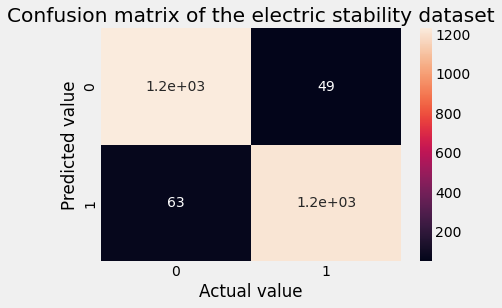

In [48]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train_sm,y_train_sm)
prediction = xgb.predict(X_test_sm)
eval_metric(prediction,y_test_sm)

## **Smote Lightgbm Classifier**

In [49]:
#unscaled dataset

train_model(LGBMClassifier(random_state=1),X_train_sm,y_train_sm,X_test_sm,y_test_sm)

The accuracy score of the LGBMClassifier(random_state=1) model is:


0.9490595611285266

In [50]:
#scaled dataset

train_model(LGBMClassifier(random_state=1),scaled_Xtrain_sm, y_train_sm, scaled_xtest_sm, y_test_sm)

The accuracy score of the LGBMClassifier(random_state=1) model is:


0.95141065830721

### **Smote Lightgbm Evaluation Metric**

The classification report is shown below 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1256
           1       0.96      0.94      0.95      1296

    accuracy                           0.95      2552
   macro avg       0.95      0.95      0.95      2552
weighted avg       0.95      0.95      0.95      2552





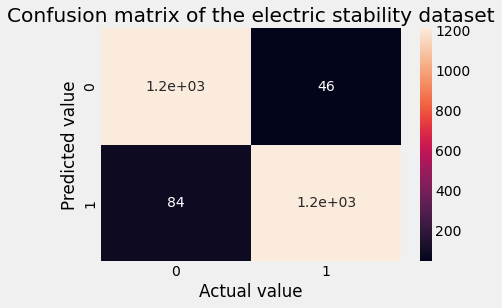

In [51]:
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(X_train_sm,y_train_sm)
prediction = lgbm.predict(X_test_sm)
eval_metric(prediction,y_test_sm)

## **Extra Trees Classifier and RandomizedSearchCV**

In [52]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features
                      }

In [53]:
ran_searchcv = RandomizedSearchCV(ExtraTreesClassifier(), 
                                  hyperparameter_grid, 
                                  cv=5, 
                                  n_iter=10, 
                                  scoring = 'accuracy', 
                                  n_jobs = -1, 
                                verbose = 1,
                                  random_state = 1
                                 )

In [54]:
ran_searchcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [55]:
ran_searchcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [56]:
optimal_model = ExtraTreesClassifier(n_estimators = 1000,
                                     min_samples_split = 2, 
                                     min_samples_leaf = 8,
                                     max_features = None,
                                     random_state = 1
)

In [57]:
train_model(optimal_model,X_train,y_train,X_test,y_test)

The accuracy score of the ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1) model is:


0.927

In [58]:
feature_importance = optimal_model.feature_importances_
sorted(zip(feature_importance,X.columns),reverse=True)

[(0.14050787123292582, 'tau2'),
 (0.13723978831645356, 'tau1'),
 (0.13541662265504284, 'tau4'),
 (0.13468049625184006, 'tau3'),
 (0.1130625748200639, 'g3'),
 (0.10954061786399034, 'g4'),
 (0.10757760496355806, 'g2'),
 (0.10256224382786308, 'g1'),
 (0.0054292680802320815, 'p3'),
 (0.0053368014620138494, 'p2'),
 (0.004962501777389839, 'p4'),
 (0.0036836087486265406, 'p1')]

## Answers to some of the quiz questions

### **1** 
You are working on a spam classification system using regularized logistic regression. 
“Spam” is a positive class (y = 1) and “not spam” is the negative class (y = 0). 
You have trained your classifier and there are n = 2000 examples in the test set. The confusion matrix of predicted class vs. actual class is:

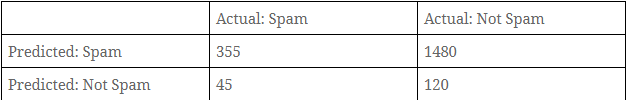

from the image the above:
-` the true positive which is the number of instances the model correctly predicts the positive class (spam) is 355

**TP = 355  that is, 355 mails were coreectly predicted as spam.**

-` the true negative (TN) which is the number of instances the model correctly predicted the negative class (not spam) is 120. 

**TN = 120  that is, 120 mails that were not spam were predicted negative by the model.**

-` The false positive (FP) which is the number of instances the model gives the wrong prediction of the negative class (not spam) is 45

**FP = 45  that is. 45 spam mails were predicted as not spam by the model.**

-` The False negative (FN) which is the number of instances the model wrongly predict the positive class (spam) is 1480

**FN = 1480  that is, 1480 mails that are not spam were predicted as spam by the model.**

**precision = TP / (TP + FP) ==> 355/(355 + 45) = 0.8875**

**recall = TP / (TP + FN) ==> 355/(355 + 1480) = 0.1935**

**F1_SCORE = 2 * (precision * recall) / (precision + recall)** 

**2 * (0.8875 * 0.1935) / (0.8875 + 0.1935)**
**= 0.3177**

 **The f1_score is 0.3177**       

**4** 

A data scientist is evaluating different binary classification models. 
A false positive result is 5 times more expensive (from a business perspective) than a false negative result. 
The models should be evaluated based on the following criteria:

1) Must have a recall rate of at least 80%

2) Must have a false positive rate of 10% or less

3) Must minimize business costs


After creating each binary classification model, the data scientist generates the corresponding confusion matrix. 
Which confusion matrix represents the model that satisfies the requirements?

Options

TN = 91%, FP = 9%, FN = 22%, TP = 78%

TN = 99%, FP = 1%, FN = 21%, TP = 79%

TN = 96%, FP = 4%, FN = 10%, TP = 90%

TN = 98%, FP = 2%, FN = 18%, TP = 82%


-` For the model to have a recall rate of at least 80%, TP must be equal to or greater than 80%
-` TN = 98%, FP = 2%, FN = 18%, TP = 82% satisfies all the requirements listed above.

What is the entropy of the target variable if its actual values are given as:
[1,0,1,1,0,1,0]

entropy is -(summation of p(X) + logp(x))
entropy = - 3/7 log(3/7) - 4/7 log(4/7)
